# Python Basics and Matplotlib

This notebook will give a very brief introduction to python and its main plotting library matplotlib.  The goal is to give us the understanding needed to interface with sensors controlled with an arduino microcontroller and plot data from them in real-time

This notebook will just focus on python and plotting

A notebook is composed of cells that can have code, text, or other data.  To edit a cell, simply double-click on it.  To run a cell, click on it, and type `ctrl-enter`

To get help, do `ctrl-m h`

This following line is for compatibility with new versions of python

In [1]:
from __future__ import print_function

## Python Basics

We will be running our python code in this Jupyter notebook.  There are other ways to write and run python code, but notebooks are convenient since everything (code, text, and output) is contained in a single file

We'll start by looking at variables in python.  A variable is simply a descriptive name that can represent data

In [2]:
a = 1
b = 2.0
c = "hello"

There are 3 variables, `a`, `b`, and `c`, and they are storing 3 different types of data that python can recognize, an integer (`1`), a floating point number (`2.0`), and a string, (`hello`)

We can do all sorts of operations on these, including assigning new variables, math, and printing the output.  Play with the code in the next cells.  Remember, use `ctrl-enter` to execute

In [3]:
print(a)

1


In [4]:
d = 2.0*a + b
print(d)

4.0


In [5]:
longer_string = c + ", how are you"
print(longer_string)

hello, how are you


## Modules and Namespaces

python has a lot of functionality built-in.  Most of this is provided through modules -- these group similar functions together.  We access the functionality in a module by `import`-ing it.  When it is imported, all of that functionality is kept separate from that of other modules (to prevent clashing), by separating it into a _namespace_.  

Let's look at the math module

In [7]:
import math

print(math.pi)

f = math.sin(2.0*math.pi)
print(f)

3.14159265359
-2.44929359829e-16


Note 2 things here.

* We get the value of the mathematical constant $\pi$, from `math` as `math.pi` -- this says "give me `pi` from the `math` namespace"
* $\sin(2\pi)$ should be 0, but it is not (it is really small).  This is a limitation of how computers store floating point numbers (anything with a decimal point).  

## Lists

Python variables can be a lot more complex than simply numbers or strings.  A very useful construct is a _list_.  This is simply a list of stuff -- where the stuff can be anything that python understands.  

We create a list using square brackets, `[` `]`, and separate items in a list with a `,`

In [8]:
my_list = [1, 2.0, 3, "four"]
print(my_list)

[1, 2.0, 3, 'four']


We can access an item in a list via its index -- but we need to remember that python starts counting at `0`

In [10]:
print(my_list[2])

3


When we take data, we are going to start off with nothing, and we will add to our list as we accumulate data.  We can create an empty list simply as
```
data = []
```

Lists are _objects_ in python.  This means that there are _methods_ that know how to operate on lists directly and manipulate them.  A very useful method is `append()`.  Some important ideas:
* methods take arguments, which are placed inside of the parantheses.
* we use the `.` to access a method on a variable
* we can always ask python for help using `help()` to learn what we can do

In [11]:
data = []
data.append(1)
data.append(2)
data.append(3)

print(data)

[1, 2, 3]


In [14]:
help(data.append)

Help on built-in function append:

append(...)
    L.append(object) -- append object to end



## Loops

Loops are an essential control structure in python -- the let us do repetitive tasks.  There are several ways to do loops.  We'll look at 2 here:

* `for` loops that iterate over a set of values
* `while` loops that iterate until some criteria is met

python uses white space to denote the block of code that is part of the loop -- indenting is important!

We'll also start using comments in the code -- these start with `#`.  Anything following this is ignored by python

In [16]:
# range is a function that returns all the integers (starting at 0) up to the argument you call it with
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [17]:
# we'll loop until a condition is met
time = 0.0
while (time < 10.0):
    print(time)
    time = time + 1.7


0.0
1.7
3.4
5.1
6.8
8.5


## Plotting

This next command is interpreted by the Jupyter notebook, and tells it to show all of the plots embedded in the notebook, instead of popping up a separate window to show the plots

In [13]:
%matplotlib inline

Like `math`, matplotlib is a module which we need to import it.  Usually we will import it as follows -- here `as` gives a new name that we will refer to (as the namespace).  This is to save on typing, and is the standard convention when using matplotlib

In [20]:
import matplotlib.pyplot as plt

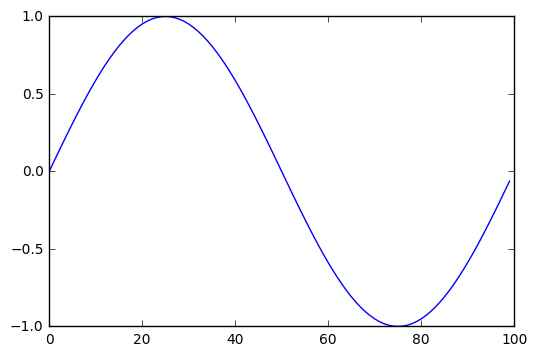

In [21]:
# create x and y lists that we will plot 
x = []
y = []

# npts is the number of points we will plot
npts = 100
for n in range(npts):
    x.append(n)
    y.append(math.sin(2.0*math.pi*n/npts))
    
plt.plot(x, y)

There are a lot of other ways to create the lists (or a different type called a NumPy array) that can be plotted.  We'll explore these as we need them.

There are also ways to label the plot, give it a title, and lots of other types of plots.

## Updating a Plot as New Data Comes In

The above plot is static -- we created all the data first and then plotted it.  When we interface with the sensors, we will want to have a plot update automatically each time we take new data.

There are other libraries that can be used aside from matplotlib that can be used to do this -- we'll look at plot.ly in the future.

To control matplotlib's plotting, we need a module from IPython -- this is what controls the rendering in the notebook itself

In [24]:
from IPython import display

Now we'll create a simple plot that updates as we get data.  

Our experiment will simply be taking a random number between [0, 1) -- this comes through the `random` module.

We'll describe the code below with comments

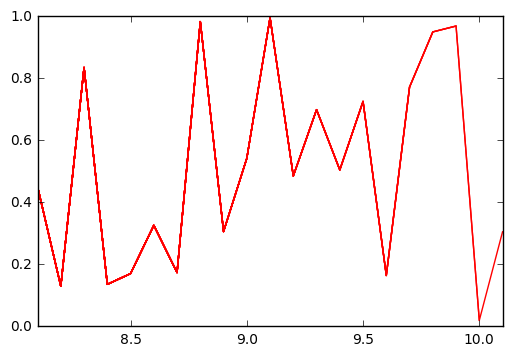

In [25]:
import random
import time

# create two lists to hold the data.  t will be the time and y will hold the random number
# associated with that time
t = []
y = []

# initialize the time and how long we want to sleep between data points
current_time = 0.0
dt = 0.1

# the maximum time we want to acquire data to
stop_time = 10

# we want our plot to adapt as we get the data -- window here is the length (in time) of 
# data we want to view, ending at the last data point
window = 2.0

# loop until we hit the stop time
while (current_time < stop_time):
    
    # increment our time counter and store the time
    current_time = current_time + dt    
    t.append(current_time)
    
    # get a data point and store it
    data_point = random.random()
    y.append(data_point)
    
    # plot the data -- here we set the color of the line to red ("r")
    plt.plot(t, y, color="r")
             
    # we want to only show a segment of the data.  tmin is the minimum time and tmax is
    # the maximum time 
    tmin = max(0, current_time - window)
    tmax = tmin + window

    # to tell matplotlib to use these new axis limits, we need to get an _axis object_, using
    # the `gca()` function
    ax = plt.gca()

    # and we use the `set_xlim` method to update the limits of the axis
    ax.set_xlim(tmin, tmax)

    # these commands tell the notebook to show the updated figure -- `gcf()` gets the "current figure"
    display.display(plt.gcf())
    display.clear_output(wait=True)
             
    # finally, we wait for dt until getting the next data point -- this uses the sleep() function
    # from the time module
    time.sleep(dt)

Notes for instructors:

this method is based on stackoverflow

http://stackoverflow.com/questions/21360361/how-to-dynamically-update-a-plot-in-a-loop-in-ipython-notebook-within-one-cell

a potential problem: the drawing of the plot takes a lot of time, so we can't rely on dt being real physical time interval between samples.  We are better off by calling time explicitly